In [11]:
from bs4 import BeautifulSoup as BS
import requests
from requests import get

In [18]:
date = []
country = []
rate = []

In [19]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    html = BS(page.content, 'html.parser')
    
    for el in html.find_all("div", class_ = "rating-10"):
        try:
            rate.append(el.span.text)
        except AttributeError:
            rate.append('None')
            
    for el in html.find_all("time"):
        date.append(el.text)
        
    for el in html.find_all("h3"):
        country.append(el.span.next_sibling.text.strip(' ()'))

In [20]:
len(date)

3426

In [21]:
len(country)

3426

In [24]:
while '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5' in rate:
    rate.remove('\n\t\t\t\t\t\t\t\t\t\t\t\t\t5')

In [25]:
len(rate)

3426

In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.DataFrame({'country':country, 'stars':rate, 'date':date})

In [29]:
df.head()

,country,stars,date
0,United Kingdom,9,30th November 2022
1,United States,2,28th November 2022
2,United Kingdom,7,26th November 2022
3,Canada,7,25th November 2022
4,United States,1,23rd November 2022


In [30]:
df.shape

(3426, 3)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
df.date = pd.to_datetime(df.date)

In [33]:
df.date.head()

0   2022-11-30
1   2022-11-28
2   2022-11-26
3   2022-11-25
4   2022-11-23
Name: date, dtype: datetime64[ns]

In [34]:
df.stars.value_counts()

1       741
2       387
3       378
8       353
10      314
7       304
9       299
4       235
5       225
6       185
None      5
Name: stars, dtype: int64

In [35]:
df.drop(df[df.stars == 'None'].index, axis=0, inplace=True)

In [36]:
df.stars.unique()

array(['9', '2', '7', '1', '4', '5', '6', '3', '8', '10'], dtype=object)

In [37]:
df.isnull().value_counts()

country  stars  date 
False    False  False    3421
dtype: int64

In [38]:
df.head()

,country,stars,date
0,United Kingdom,9,2022-11-30
1,United States,2,2022-11-28
2,United Kingdom,7,2022-11-26
3,Canada,7,2022-11-25
4,United States,1,2022-11-23


In [39]:
df.size

10263

In [40]:
df.shape

(3421, 3)

In [41]:
df.stars.mean()

inf

In [42]:
country_df = pd.DataFrame(df.country.value_counts())

In [43]:
country_df

,country
United Kingdom,2175
United States,355
Australia,152
Canada,103
Germany,59
...,...
Cayman Islands,1
Jordan,1
Saint Kitts and Nevis,1
Panama,1


In [45]:
mean_stars_df = df.groupby('country', as_index=False).aggregate({'stars':'mean'}).rename(columns = {'stars':'mean_stars'})

In [47]:
mean_stars_df.head()

,country,mean_stars
0,,1.300000e+01
1,Argentina,5.379783e+04
2,Australia,2.967902e+159
3,Austria,2.656108e+09
4,Bahrain,1.000000e+00


<AxesSubplot:>

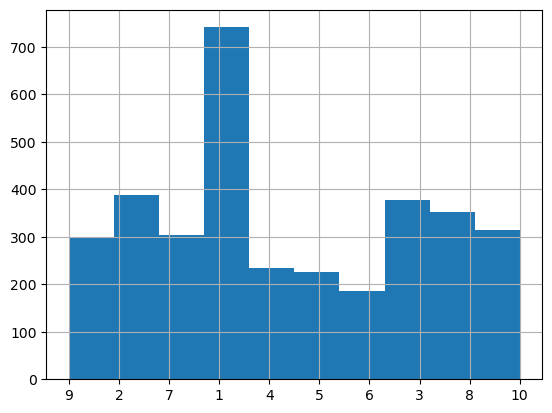

In [49]:
df.stars.hist()

<AxesSubplot:xlabel='stars', ylabel='date'>

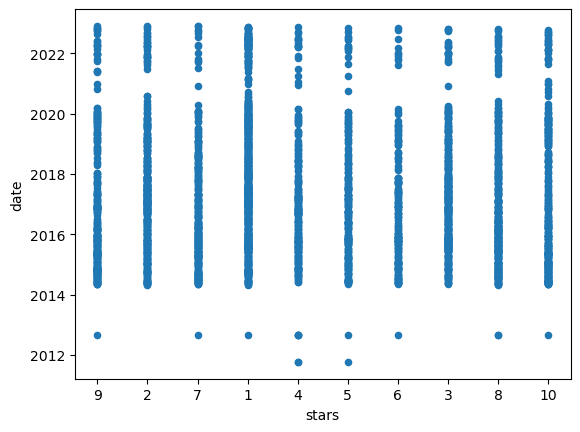

In [50]:
df.plot.scatter(x='stars', y='date')

In [55]:
x = df.date
y = df.stars

<BarContainer object of 3421 artists>

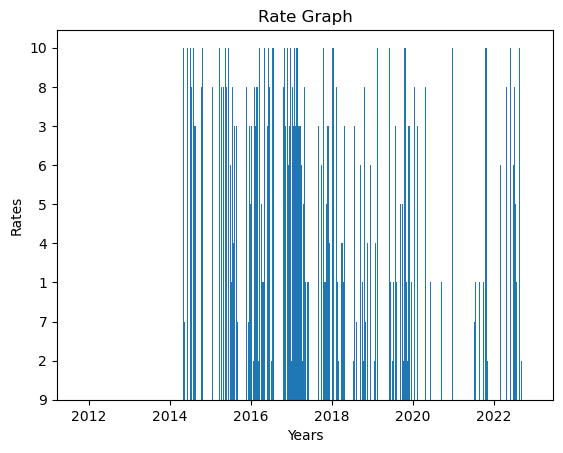

In [68]:
plt.title('Rate Graph')
plt.xlabel("Years")
plt.ylabel("Rates")
plt.bar(x, y)

In [69]:
import os

In [70]:
cwd = os.getcwd()
df.to_csv(cwd+'/BA.csv')